### MODEL FOR PERCLOS NEURAL NET

In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K

### GETTING Data

In [2]:
dfAwake_train = pd.read_csv('Data/Data for 2nd Level Classification/training2_AData.txt', header=None, delim_whitespace=True)
dfDrowsy_train = pd.read_csv('Data/Data for 2nd Level Classification/training2_DData.txt', header=None, delim_whitespace=True)
dfAwake_test = pd.read_csv('Data/Data for 2nd Level Classification/testing2_AData.txt', header=None, delim_whitespace=True)
dfDrowsy_test = pd.read_csv('Data/Data for 2nd Level Classification/testing2_DData.txt', header=None, delim_whitespace=True)

# dfAwake_train = pd.read_csv('Data/Validation/validation_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train = pd.read_csv('Data/Validation/validation_DData.txt', header=None, delim_whitespace=True)

# dfAwake_train1 = pd.read_csv('Data/Validation/validation_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train1 = pd.read_csv('Data/Validation/validation_DData.txt', header=None, delim_whitespace=True)
# dfAwake_train2 = pd.read_csv('Data/Data for 2nd Level Classification/testing2_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train2 = pd.read_csv('Data/Data for 2nd Level Classification/testing2_DData.txt', header=None, delim_whitespace=True)

In [ ]:
# Awake_frames = [dfAwake_train1, dfAwake_train2]
# Drowsy_frames = [dfDrowsy_train1, dfDrowsy_train2]
# dfAwake_train = pd.concat(Awake_frames)
# dfDrowsy_train = pd.concat(Drowsy_frames)

### Printing Retrieved Data informations

In [3]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
print(dfAwake_test.shape)
print(dfDrowsy_test.shape)

(2910600, 15)
(2430000, 15)
(810000, 15)
(1080000, 15)


### Dropping Not Needed Columns

In [4]:
dfAwake_train = dfAwake_train.drop(11,axis = 1)
dfAwake_train = dfAwake_train.drop(dfAwake_train.iloc[:,0:3],axis = 1)
dfDrowsy_train = dfDrowsy_train.drop(11,axis = 1)
dfDrowsy_train = dfDrowsy_train.drop(dfDrowsy_train.iloc[:,0:3],axis = 1)
dfAwake_test = dfAwake_test.drop(11,axis = 1)
dfAwake_test = dfAwake_test.drop(dfAwake_test.iloc[:,0:3],axis = 1)
dfDrowsy_test = dfDrowsy_test.drop(11,axis = 1)
dfDrowsy_test = dfDrowsy_test.drop(dfDrowsy_test.iloc[:,0:3],axis = 1)

In [5]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
print(dfAwake_test.shape)
print(dfDrowsy_test.shape)

(2910600, 11)
(2430000, 11)
(810000, 11)
(1080000, 11)


### RESHAPING DATA

In [6]:
dfAwake_train = dfAwake_train.to_numpy()
dfDrowsy_train = dfDrowsy_train.to_numpy()
dfAwake_train = dfAwake_train.reshape(3234,900,11)
dfDrowsy_train = dfDrowsy_train.reshape(2700,900,11)
dfAwake_test = dfAwake_test.to_numpy()
dfDrowsy_test = dfDrowsy_test.to_numpy()
dfAwake_test = dfAwake_test.reshape(900,900,11)
dfDrowsy_test = dfDrowsy_test.reshape(1200,900,11)

In [7]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
print(dfAwake_test.shape)
print(dfDrowsy_test.shape)
# print(dfAwake_train)
# print(dfDrowsy_train)

(3234, 900, 11)
(2700, 900, 11)
(900, 900, 11)
(1200, 900, 11)


### CREATING LABELS

In [8]:
dfAwake_trainLabels = np.zeros(3234)
print(dfAwake_trainLabels.shape)
dfDrowsy_trainLabels = np.ones(2700)
print(dfDrowsy_trainLabels.shape)
dfAwake_testLabels = np.zeros(900)
print(dfAwake_testLabels.shape)
dfDrowsy_testLabels = np.ones(1200)
print(dfDrowsy_testLabels.shape)

(3234,)
(2700,)
(900,)
(1200,)


In [9]:
print(dfAwake_trainLabels)
print(dfDrowsy_trainLabels)
print(dfAwake_testLabels)
print(dfDrowsy_testLabels)

[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

### Combining Awake Data and Drowsy Data

In [10]:
dftrain = np.concatenate((dfAwake_train, dfDrowsy_train))
dftrainlabels =np.concatenate((dfAwake_trainLabels, dfDrowsy_trainLabels))
# dftrain = dfAwake_train
# dftrainlabels = dfAwake_trainLabels
print(dftrain.shape)
print(dftrainlabels.shape)
print(dftrain)
print(dftrainlabels)

(5934, 900, 11)
(5934,)
[[[ 1.00000000e+00  2.75739300e+00  1.72400600e+00 ... -1.34717759e-02
   -3.92532662e-03  3.66666700e+00]
  [ 1.00000000e+00  5.04561000e-01  8.13233000e-01 ...  5.61919477e-03
    4.93475497e-03  3.66666700e+00]
  [ 1.00000000e+00  5.04561000e-01  8.13233000e-01 ...  2.17698843e-02
    5.36659562e-04  3.66666700e+00]
  ...
  [ 1.00000000e+00  6.21410000e-01  9.37510000e-02 ...  1.13668412e-02
   -3.09512913e-03  3.00000000e+00]
  [ 1.00000000e+00  6.21410000e-01  9.37510000e-02 ...  1.40385734e-02
   -4.26882061e-03  3.00000000e+00]
  [ 1.00000000e+00  4.05440000e-02  9.58200000e-03 ...  2.12186481e-02
   -3.93233111e-03  3.00000000e+00]]

 [[ 1.00000000e+00  5.04561000e-01  8.13233000e-01 ...  5.61919477e-03
    4.93475497e-03  3.66666700e+00]
  [ 1.00000000e+00  5.04561000e-01  8.13233000e-01 ...  2.17698843e-02
    5.36659562e-04  3.66666700e+00]
  [ 1.00000000e+00  5.04561000e-01  8.13233000e-01 ...  4.05722111e-03
    1.38008344e-02  3.66666700e+00]
  ...

### SHUFFLING DATA

In [11]:
idx = np.random.permutation(len(dftrainlabels))
print(idx)

[2985 3802 3901 ...   28 4636 2141]


In [12]:
dftrain=dftrain[idx]
dftrainlabels=dftrainlabels[idx]

In [13]:
print(dftrain.shape)
print(dftrainlabels.shape)
print(dftrain)
print(dftrainlabels)

(5934, 900, 11)
(5934,)
[[[ 1.00000000e+00  4.09650000e-01  1.05965000e-01 ...  9.17507457e-03
    3.48580351e-03  6.66666700e+00]
  [ 1.00000000e+00  4.09650000e-01  1.05965000e-01 ...  1.11799328e-02
   -2.29302997e-03  6.66666700e+00]
  [ 1.00000000e+00  4.09650000e-01  1.05965000e-01 ... -1.32354364e-02
   -8.28966609e-03  6.66666700e+00]
  ...
  [ 1.00000000e+00  3.70247000e-01  1.54297000e-01 ...  5.96478969e-04
    1.51313416e-03  8.44444400e+00]
  [ 1.00000000e+00  3.70247000e-01  1.54297000e-01 ...  7.32253868e-04
    2.36214518e-02  8.11111100e+00]
  [ 1.00000000e+00  3.52760000e-01  1.09854000e-01 ... -8.63896337e-03
    1.94500087e-02  8.11111100e+00]]

 [[ 1.00000000e+00  4.40828000e-01  2.18520000e-02 ... -1.49633980e-02
   -3.27805687e-02  3.44444400e+00]
  [ 1.00000000e+00  4.40828000e-01  2.18520000e-02 ... -1.17286092e-02
   -2.03315386e-02  3.55555600e+00]
  [ 1.00000000e+00  4.40828000e-01  2.18520000e-02 ...  1.14977402e-03
    7.80862568e-03  3.55555600e+00]
  ...

In [14]:
dftest = np.concatenate((dfAwake_test, dfDrowsy_test))
dftestlabels =np.concatenate((dfAwake_testLabels, dfDrowsy_testLabels))
print(dftest.shape)
print(dftestlabels.shape)
print(dftest)
print(dftestlabels)

(2100, 900, 11)
(2100,)
[[[ 1.00000000e+00  5.92970000e-02  2.03340000e-02 ...  2.31182822e-02
    1.10939983e-02  7.77778000e-01]
  [ 1.00000000e+00  2.88129000e-01  5.81080000e-02 ...  3.49203647e-02
   -1.85772118e-02  7.77778000e-01]
  [ 1.00000000e+00  2.88129000e-01  5.81080000e-02 ...  2.78440513e-02
   -1.86193334e-02  7.77778000e-01]
  ...
  [ 1.00000000e+00  6.62710000e-02  3.15420000e-02 ...  1.44621208e-02
   -1.79475640e-02  1.66666700e+00]
  [ 1.00000000e+00  2.66998000e-01  1.29318000e-01 ...  1.53153165e-02
   -1.28240248e-02  1.66666700e+00]
  [ 1.00000000e+00  2.66998000e-01  1.29318000e-01 ...  5.47928315e-03
   -1.26411032e-02  1.66666700e+00]]

 [[ 1.00000000e+00  2.88129000e-01  5.81080000e-02 ...  3.49203647e-02
   -1.85772118e-02  7.77778000e-01]
  [ 1.00000000e+00  2.88129000e-01  5.81080000e-02 ...  2.78440513e-02
   -1.86193334e-02  7.77778000e-01]
  [ 1.00000000e+00  2.88129000e-01  5.81080000e-02 ...  2.61632669e-03
   -2.43486785e-02  7.77778000e-01]
  ...

In [15]:
print(dftest.shape)
print(dftestlabels.shape)
print(dftrain.shape)
print(dftrainlabels.shape)

(2100, 900, 11)
(2100,)
(5934, 900, 11)
(5934,)


### Set input and output dimensions

In [16]:
input_shape = 900*11
num_classes = 2
print('dftrain shape:', dftrain.shape)
print('input_shape:', input_shape)

dftrain shape: (5934, 900, 11)
input_shape: 9900


In [17]:
dftrain = dftrain.astype('float32')
dftrainlabels = dftrainlabels.astype('float32')

In [18]:
dftrainlabels_hot = np_utils.to_categorical(dftrainlabels,num_classes)
print('New dfttrainlabels shape: ', dftrainlabels_hot)

New dfttrainlabels shape:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [19]:
print('New dfttrainlabels shape: ', dftrainlabels_hot.shape)
print(dftrainlabels)

New dfttrainlabels shape:  (5934, 2)
[0. 1. 1. ... 0. 1. 0.]


In [20]:
print(dftrain.shape)
print(dftrainlabels.shape)

(5934, 900, 11)
(5934,)


In [21]:
LABELS = ['Awake','Drowsy']

In [22]:
model = keras.models.load_model("best_model(single-levelv1).h5")

test_loss, test_acc = model.evaluate(dftrain, dftrainlabels,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

max_y_train = np.argmax(dftrainlabels_hot, axis=1)

# Print confusion matrix for training data
y_pred_train = model.predict(dftrain)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(dftrainlabels, max_y_pred_train))

OSError: No file or directory found at best_model(single-levelv1).h5

In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

show_confusion_matrix(max_y_train, max_y_pred_train)

### Building the MODEL

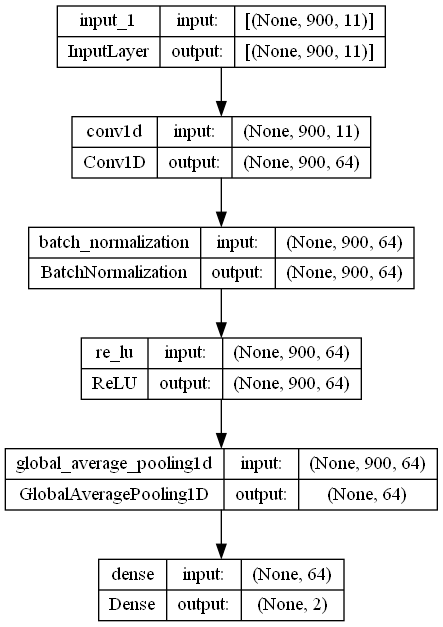

In [23]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    # conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    # conv2 = keras.layers.BatchNormalization()(conv2)
    # conv2 = keras.layers.ReLU()(conv2)

    # conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    # conv3 = keras.layers.BatchNormalization()(conv3)
    # conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv1)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=dftrain.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

### FITTING Deep neural network Model in KERAS

In [ ]:
epochs = 100
batch_size = 540

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model(single-level).h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=12, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
# model.compile(
#     optimizer="adam",
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )
history = model.fit(
    dftrain,
    dftrainlabels,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.4,
    verbose=1,
)

In [ ]:
# plt.figure(figsize=(6, 4))
# plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
# plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
# plt.title('Model Accuracy and Loss')
# plt.ylabel('Accuracy and Loss')
# plt.xlabel('Training Epoch')
# plt.ylim(0)
# plt.legend()
# plt.show()

metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val","loss","val_loss"], loc="best")
plt.show()
plt.close()

# Print confusion matrix for training data
y_pred_train = model.predict(dftrain)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(dftrainlabels, max_y_pred_train))

### Checking against Testing Data

In [24]:

# Set input_shape / reshape for Keras
# dftest = dftest.reshape(dftest.shape[0], input_shape)

dftest = dftest.astype('float32')
dftestlabels = dftestlabels.astype('float32')

dftestlabels_hot = np_utils.to_categorical(dftestlabels, num_classes)


In [25]:
print('New dfttrainlabels shape: ', dftestlabels_hot)
print('New dfttrainlabels shape: ', dftestlabels.shape)
print('New dfttrainlabels shape: ', dftestlabels)

New dfttrainlabels shape:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
New dfttrainlabels shape:  (2100,)
New dfttrainlabels shape:  [0. 0. 0. ... 1. 1. 1.]


In [ ]:
# score = model_m.evaluate(dftest, dftestlabels_hot, verbose=1)

# print('\nAccuracy on test data: %0.2f' % score[1])
# print('\nLoss on test data: %0.2f' % score[0])

In [26]:
# LABELS = ['Awake','Drowsy','Indeterminate']
LABELS = ['Awake','Drowsy']

In [ ]:
# metric = "sparse_categorical_accuracy"
# plt.figure()
# plt.plot(history.history[metric])
# plt.plot(history.history["val_" + metric])
# plt.title("model " + metric)
# plt.ylabel(metric, fontsize="large")
# plt.xlabel("epoch", fontsize="large")
# plt.legend(["train", "val"], loc="best")
# plt.show()
# plt.close()

In [27]:
model = keras.models.load_model("Early Models/best_model(single-levelv1).h5")

test_loss, test_acc = model.evaluate(dftest, dftestlabels,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

66/66 [==============================] - 0s 3ms/step - loss: 0.0929 - sparse_categorical_accuracy: 0.9900
Test accuracy 0.9900000095367432
Test loss 0.09293889254331589


In [ ]:
# # Print confusion matrix for training data
# y_pred_train = model.predict(dftest)
# # Take the class with the highest probability from the train predictions
# max_y_pred_train = np.argmax(y_pred_train, axis=1)
# print(classification_report(dftestlabels, max_y_pred_train))

66/66 [==============================] - 0s 4ms/step


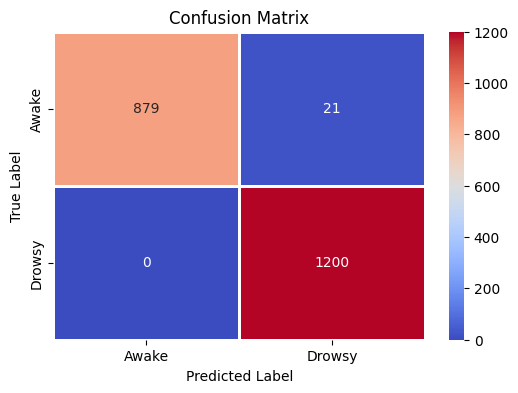

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       900
           1       0.98      1.00      0.99      1200

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [28]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(dftest)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(dftestlabels_hot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# model = keras.models.load_model("best_model.h5")
# print(model.summary())

### ROC and AUC

66/66 [==============================] - 0s 3ms/step
[[9.99878645e-01 1.21298632e-04]
 [9.99878645e-01 1.21308571e-04]
 [9.99878764e-01 1.21232144e-04]
 ...
 [1.13670573e-01 8.86329412e-01]
 [1.14180401e-01 8.85819614e-01]
 [1.14640661e-01 8.85359347e-01]]


C:\Users\admin\AppData\Local\Temp\ipykernel_22140\3476021706.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


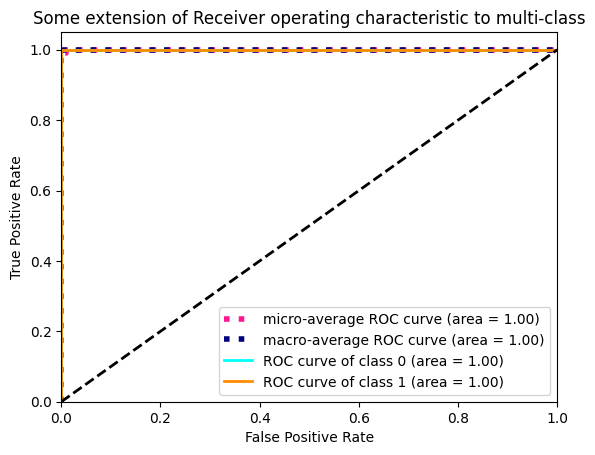

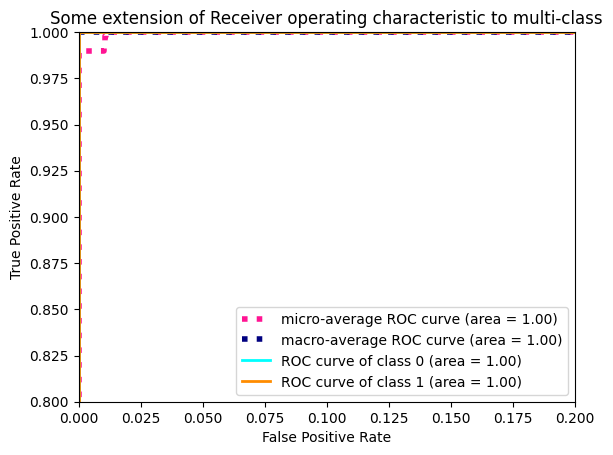

In [29]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_scores = model.predict(dftest)
print(y_scores)

lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(dftestlabels_hot[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(dftestlabels_hot.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()